<a href="https://colab.research.google.com/github/Anusha-jain-h-c/Data-Science-Assignment/blob/main/amazon_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(12,8)


In [11]:
data=pd.read_csv('/amazon_alexa.tsv',sep='\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [13]:
data.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [14]:
data['rating'].value_counts().describe()

count       5.00000
mean      630.00000
std       936.29082
min        96.00000
25%       152.00000
50%       161.00000
75%       455.00000
max      2286.00000
Name: rating, dtype: float64

In [15]:
data['length'] = data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


Convert in Bag Of Words(BOW)

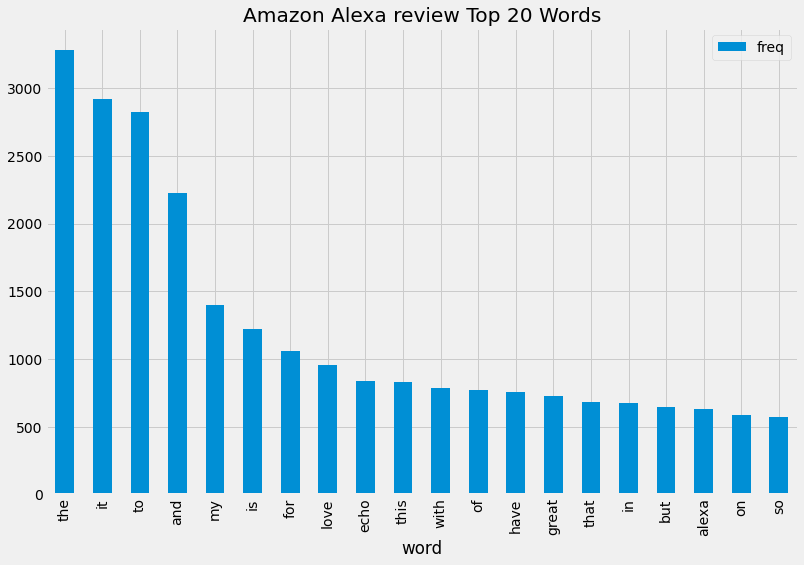

In [16]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(STOP_WORDS)
words=cv.fit_transform(data['verified_reviews'])
words_sum=words.sum(axis=0)

words_freq=[(word,words_sum[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

frequency=pd.DataFrame(words_freq,columns=['word','freq'])
frequency.head(20).plot.bar(x='word',y='freq',figsize=(12,8))
plt.title('Amazon Alexa review Top 20 Words')
plt.show()

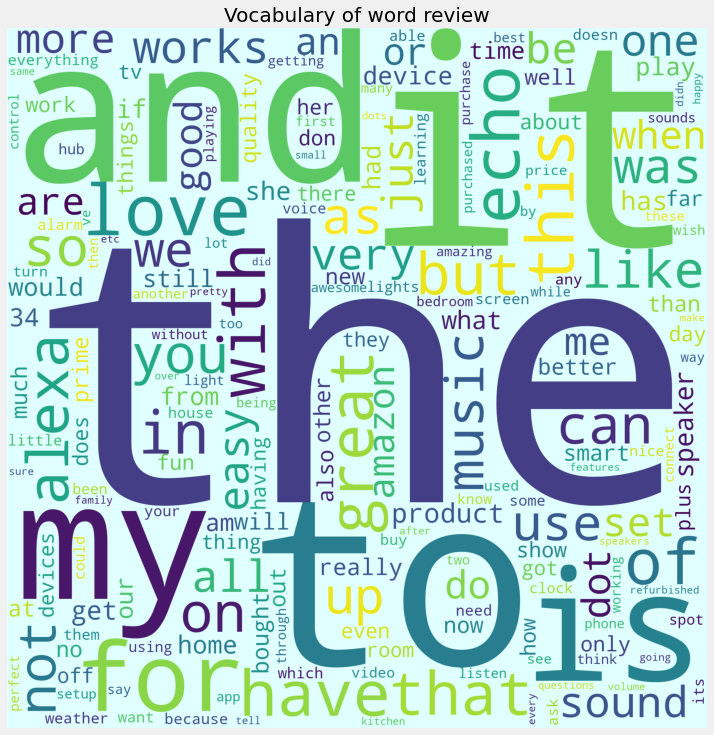

In [17]:
from wordcloud import WordCloud

wordcloud=WordCloud(background_color='lightcyan',
                   width=2000,
                   height=2000).generate_from_frequencies(dict(words_freq))
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,12))
plt.title('Vocabulary of word review',fontsize=20)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [18]:
import spacy
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp=spacy.load('en_core_web_sm')

def explain_text_entities(text):
    doc=nlp(text)
    for ent in doc.ents:
        print(f'Entity:{ent},Label:{ent.label_},{spacy.explain.ent.label_}')
for i in range(0,3150):
    one_sentence=data['verified_reviews'][i]
    doc=nlp(one_sentence)
    displacy.render(doc,style='ent')

/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)
/usr/lib/python3.7/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is su

In [19]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
from nltk.stem.porter import PorterStemmer
import re

In [20]:
corpus=[]
for i in range(0,3150):
    review=re.sub('[^a-zA-Z]',' ',data['verified_reviews'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if word not in STOP_WORDS]
    review=' '.join(review)
    corpus.append(review)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=CountVectorizer(max_features=2500)
X=cv.fit_transform(corpus).toarray()
y=data.iloc[:,4].values

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X_train=mm.fit_transform(X_train)
X_test=mm.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model=RandomForestClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("Training Accuracy:",model.score(X_train,y_train))
print("Testing Accuracy:",model.score(X_test,y_test))

Training Accuracy: 0.9932539682539683
Testing Accuracy: 0.9412698412698413


In [25]:
cm=confusion_matrix(y_pred,y_test)

In [26]:
print("Confusion Matrix: ",cm)

Confusion Matrix:  [[ 25   4]
 [ 33 568]]


In [27]:

positive=data[data['feedback']==1]
negative=data[data['feedback']==0]


In [28]:
positive


,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


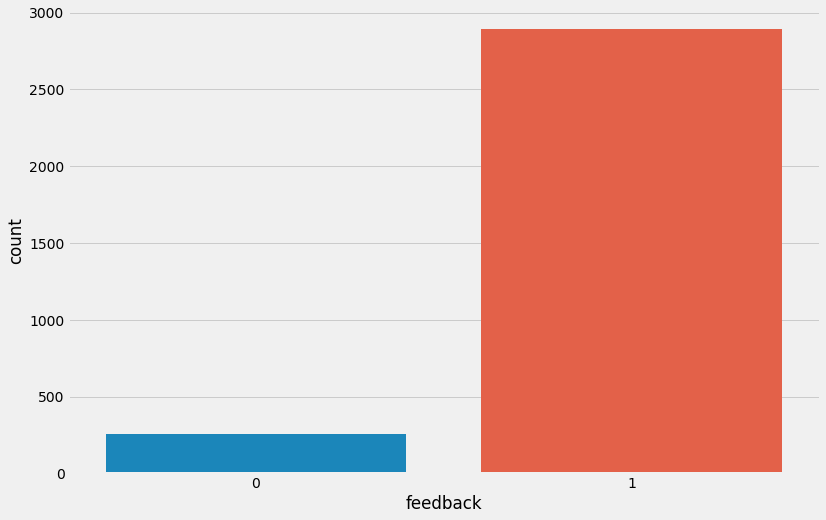

In [29]:
sns.countplot(x='feedback',data=data)

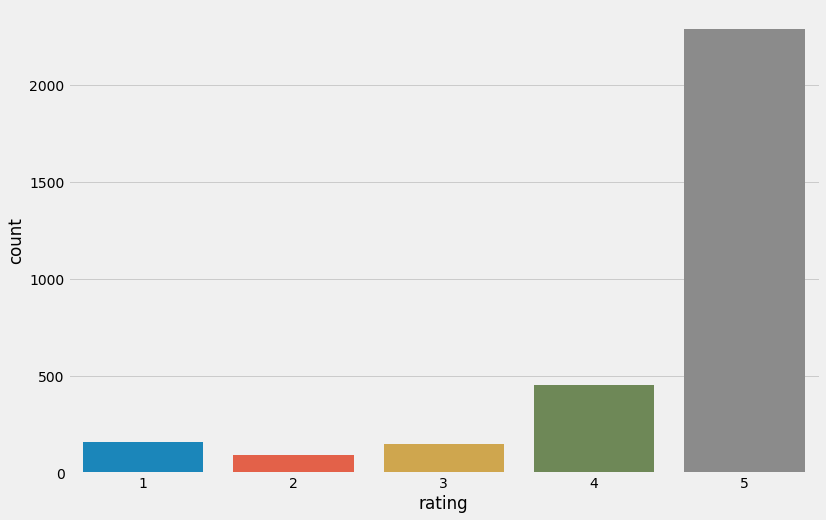

In [30]:
sns.countplot(x='rating',data=data)

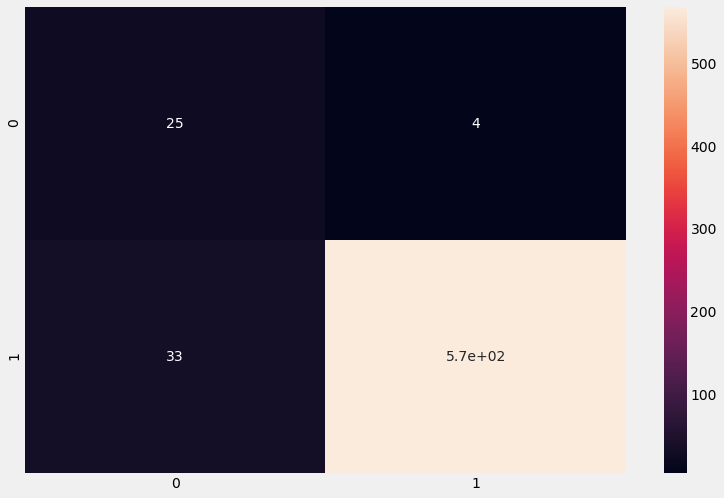

In [31]:
sns.heatmap(cm,annot=True)
